In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('./dataset/data.csv')
df.head()

,OBJECTID,STATION,COMMENTS,COUNTY,ABPair,Sta_Dir,Motorcycles,PassCars,Buses,SUTrucks,...,TOD,TotVol,StartDate,EndDate,TimeLabel,AllTrucks,IsPerm,PickupsPanelVans,XCOORD,YCOORD
0,1,301502,Sycolin Rd from 53-653 S. Shreve Mill Rd to SC...,Loudoun County,3865738153,301502_W,3,696,30,48,...,AM,887,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,50,NaN,110,-77.552040,39.069540
1,2,301502,Sycolin Rd from 53-653 S. Shreve Mill Rd to SC...,Loudoun County,3815338657,301502_E,3,1502,49,64,...,AM,1919,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,66,NaN,300,-77.551983,39.069347
2,3,1701,ROCHAMBEAU BRG SW between INTERSTATE 395 VA an...,District of Columbia,2139030364,1701_S,45,16784,177,483,...,AM,18972,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,595,P,1370,-77.035875,38.879244
3,4,1202,INTERSTATE 66 ON ROSSEVELT MEMORIAL BRG,District of Columbia,2027220001,1202_W,51,5272,50,67,...,AM,5830,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,142,P,315,-77.059594,38.892328
4,5,3902,FRANCIS SCOTT KEY BRG NW between M ST NW and W...,District of Columbia,2060130365,3902_S,54,2981,23,138,...,AM,4257,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,616,P,583,-77.069735,38.902649


Count the number of Stations in each County

In [15]:
station_count = df[['OBJECTID', 'COUNTY']].groupby('COUNTY').count()

Vehicle Counts in each county

In [13]:
df.columns

Index(['OBJECTID', 'STATION', 'COMMENTS', 'COUNTY', 'ABPair', 'Sta_Dir',
       'Motorcycles', 'PassCars', 'Buses', 'SUTrucks', 'CTrucks', 'TOD',
       'TotVol', 'StartDate', 'EndDate', 'TimeLabel', 'AllTrucks', 'IsPerm',
       'PickupsPanelVans', 'XCOORD', 'YCOORD'],
      dtype='object')

In [18]:
car_types = ['COUNTY', 'Motorcycles', 'PassCars', 'Buses', 'SUTrucks', 'CTrucks', 'TotVol']

car_sums = df[car_types].groupby('COUNTY').sum()
car_sums['Station_count'] = station_count

In [19]:
car_sums

,Motorcycles,PassCars,Buses,SUTrucks,CTrucks,TotVol,Station_count
COUNTY,,,,,,,
Anne Arundel County,439,200504,2581,8951,3155,252433,92
Arlington County,130,24857,353,341,55,28641,8
Baltimore County,24,19897,132,743,821,24414,4
Calvert County,269,81981,1140,5208,1532,112808,62
Carroll County,57,26675,313,2075,742,35727,26
Charles County,140,36522,705,2307,899,49164,42
City of Fairfax,30,11534,187,232,148,13768,10
Clarke County,15,5718,65,133,458,7958,4
District of Columbia,1079,221408,3428,13418,3268,267541,59


<Container object of 25 artists>

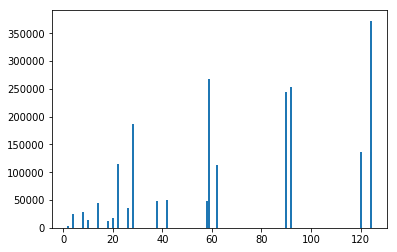

In [23]:
import matplotlib.pyplot as plt

plt.bar(car_sums.Station_count, car_sums.TotVol)

Create a csv that contains geolocation for each station

In [59]:
geo = ['STATION', 'XCOORD', 'YCOORD']
geo_info = df[geo].groupby('STATION').mean()
geo_info.head()

,XCOORD,YCOORD
STATION,,
1202,-77.059594,38.892328
1403,-76.989517,38.871882
1501,-77.032551,38.879280
1503,-77.015191,38.903539
160001,-77.409360,38.456580


In [54]:
totals = df[['STATION', 'TotVol']].groupby('STATION').sum()
totals.head()

,TotVol
STATION,
1202,19028
1403,13667
1501,33959
1503,10057
160001,9031


In [55]:
geo_info['TotVol'] = totals.TotVol

In [56]:
geo_info.head()

,XCOORD,YCOORD,TotVol
STATION,,,
1202,-77.059594,38.892328,19028
1403,-76.989517,38.871882,13667
1501,-77.032551,38.879280,33959
1503,-77.015191,38.903539,10057
160001,-77.409360,38.456580,9031


In [57]:
geo_info.to_csv('coords.csv', index=False)

In [58]:
!head coords.csv

XCOORD,YCOORD,TotVol
-77.05959412,38.89232808,19028
-76.98951707,38.87188215,13667
-77.03255136,38.87927969,33959
-77.01519097,38.90353874,10057
-77.40935999999999,38.456579999999995,9031
-77.50837,38.138729999999995,6614
-77.09470999999999,38.32395,3117
-77.50761,38.2179,3385
-77.68189,38.31289,4365


After plotting these coordinates on a map we could tell most traffic was in Washington DC. Now the question was are we sure this is people entering DC. The answer we expect is, well, yes, because our data is 6AM to 9AM, but what does the data say?

In [93]:
(df.COUNTY != 'District of Columbia').sum()

834

In [95]:
# 38.9072° N, 77.0369° W from google

dc_xcoord = -77.0369 
dc_ycoord = 38.9072

dir_data = df.loc[df.COUNTY != 'District of Columbia']
dir_data

,OBJECTID,STATION,COMMENTS,COUNTY,ABPair,Sta_Dir,Motorcycles,PassCars,Buses,SUTrucks,...,TOD,TotVol,StartDate,EndDate,TimeLabel,AllTrucks,IsPerm,PickupsPanelVans,XCOORD,YCOORD
0,1,301502,Sycolin Rd from 53-653 S. Shreve Mill Rd to SC...,Loudoun County,3865738153,301502_W,3,696,30,48,...,AM,887,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,50,NaN,110,-77.552040,39.069540
1,2,301502,Sycolin Rd from 53-653 S. Shreve Mill Rd to SC...,Loudoun County,3815338657,301502_E,3,1502,49,64,...,AM,1919,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,66,NaN,300,-77.551983,39.069347
18,19,80336,VA7 from Frederick County Line to Bus SR 7 Wes...,Clarke County,5402654010,80336_W,4,1364,16,29,...,AM,1851,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,113,P,354,-78.052990,39.176040
19,20,90049,VA7 from 53-760 Near Bluemont to Bus SR 7 West...,Loudoun County,3824538401,90049_W,3,906,21,32,...,AM,1287,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,66,P,291,-77.780330,39.129120
20,21,90063,"VA7 from SR 9, Bus SR 7 Clarkes Gap to Bus SR ...",Loudoun County,3837838130,90063_W,8,1929,40,142,...,AM,2847,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,204,P,667,-77.594120,39.136500
21,22,60148,US1 from 89-610 Garrisonville Rd to 89-639 Woo...,Stafford County,5102951030,60148_S,1,1040,22,29,...,AM,1320,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,37,P,221,-77.394260,38.474560
22,23,90170,"US1 from SR 235 S, Mount Vernon Memorial Hwy t...",Fairfax County,3427534155,90170_S,3,2720,49,41,...,AM,3297,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,54,P,471,-77.129300,38.718860
23,24,160015,US1 from 88-608 Massaponax Church Rd to US 17 ...,Spotsylvania County,5214952016,160015_S,0,964,35,53,...,AM,1403,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,85,NaN,319,-77.507610,38.217900
24,25,301471,Evergreen Mills Rd from 53-617 Red Hill Rd; 53...,Loudoun County,3816838398,301471_S,2,1107,16,20,...,AM,1470,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,24,NaN,322,-77.573820,39.010990
25,26,190143,VA7 from SR 7 Between Round Hill and Purcellvi...,Loudoun County,3853038402,190143_W,1,356,18,21,...,AM,518,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,25,NaN,119,-77.751240,39.136670


In [96]:
dir_data = dir_data[['STATION', 'Sta_Dir', 'TotVol', 'XCOORD', 'YCOORD']]
dir_data.head()

,STATION,Sta_Dir,TotVol,XCOORD,YCOORD
0,301502,301502_W,887,-77.552040,39.069540
1,301502,301502_E,1919,-77.551983,39.069347
18,80336,80336_W,1851,-78.052990,39.176040
19,90049,90049_W,1287,-77.780330,39.129120
20,90063,90063_W,2847,-77.594120,39.136500


In [97]:
#grab the direction letter from the back of Sta_Dir
dir_data['direction'] = dir_data.Sta_Dir.copy().str.slice(-1)

C:\Users\m202562\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
dir_data.head()

,STATION,Sta_Dir,TotVol,XCOORD,YCOORD,direction
0,301502,301502_W,887,-77.552040,39.069540,W
1,301502,301502_E,1919,-77.551983,39.069347,E
18,80336,80336_W,1851,-78.052990,39.176040,W
19,90049,90049_W,1287,-77.780330,39.129120,W
20,90063,90063_W,2847,-77.594120,39.136500,W


In [99]:
into_dc = [] #1 is into DC, 0 is out of DC

for idex, row in dir_data.iterrows():
    
    if row.direction == 'W': #traffic going west
        into_dc.append(row.XCOORD > dc_xcoord) #true if heading to DC
    elif row.direction == 'E':
        into_dc.append(row.XCOORD < dc_xcoord)
    elif row.direction == 'N':
        into_dc.append(row.YCOORD < dc_ycoord)
    elif row.direction == 'S':
        into_dc.append(row.YCOORD > dc_ycoord)
    else:
        into_dc.append(-1)

dir_data['into_dc'] = into_dc
dir_data.head()

C:\Users\m202562\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,STATION,Sta_Dir,TotVol,XCOORD,YCOORD,direction,into_dc
0,301502,301502_W,887,-77.552040,39.069540,W,False
1,301502,301502_E,1919,-77.551983,39.069347,E,True
18,80336,80336_W,1851,-78.052990,39.176040,W,False
19,90049,90049_W,1287,-77.780330,39.129120,W,False
20,90063,90063_W,2847,-77.594120,39.136500,W,False


In [100]:
dir_vol = dir_data[['into_dc', 'TotVol']].groupby('into_dc').sum()
dir_vol

,TotVol
into_dc,
False,780870
True,1064744


<Container object of 2 artists>

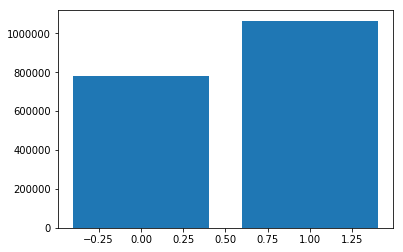

In [101]:
plt.bar(dir_vol.index,dir_vol.TotVol)

In [107]:
dir_data[['TotVol', 'XCOORD', 'YCOORD', 'direction', 'into_dc']].to_csv('dir_coord.csv', index=False)

In [105]:
dir_data.shape

(834, 7)

In [109]:
car_types = ['STATION', 'Motorcycles', 'PassCars', 'Buses', 'SUTrucks', 'CTrucks', 'TotVol']

type_vol = df[car_types].groupby('STATION').sum()

In [110]:
type_vol['XCOORD'] = geo_info.XCOORD
type_vol['YCOORD'] = geo_info.YCOORD
type_vol.head()

,Motorcycles,PassCars,Buses,SUTrucks,CTrucks,TotVol,XCOORD,YCOORD
STATION,,,,,,,,
1202,85,16278,167,295,145,19028,-77.059594,38.892328
1403,19,11671,159,334,33,13667,-76.989517,38.871882
1501,56,32020,101,457,90,33959,-77.032551,38.879280
1503,43,8367,60,305,84,10057,-77.015191,38.903539
160001,13,6292,95,202,783,9031,-77.409360,38.456580


In [111]:
type_vol.to_csv('type_vol.csv', index=False)

Calculate number of passenger vehicles vs trucks

In [112]:
df.columns

Index(['OBJECTID', 'STATION', 'COMMENTS', 'COUNTY', 'ABPair', 'Sta_Dir',
       'Motorcycles', 'PassCars', 'Buses', 'SUTrucks', 'CTrucks', 'TOD',
       'TotVol', 'StartDate', 'EndDate', 'TimeLabel', 'AllTrucks', 'IsPerm',
       'PickupsPanelVans', 'XCOORD', 'YCOORD'],
      dtype='object')

In [113]:
f = ['STATION', 'Motorcycles', 'PassCars', 'Buses', 'SUTrucks', 'CTrucks', 'PickupsPanelVans']

numbers = df[f].groupby('STATION').sum()

In [119]:
numbers['passenger'] = numbers.Motorcycles + numbers.PassCars + numbers.Buses + numbers.PickupsPanelVans
numbers['work'] = numbers.SUTrucks + numbers.CTrucks
numbers.head()

,Motorcycles,PassCars,Buses,SUTrucks,CTrucks,PickupsPanelVans,passenger,work,p-w-ratio
STATION,,,,,,,,,
1202,85,16278,167,295,145,2059,18589,440,6.614646
1403,19,11671,159,334,33,1452,13301,367,6.514019
1501,56,32020,101,457,90,1236,33413,547,18.046551
1503,43,8367,60,305,84,1197,9667,389,5.340479
160001,13,6292,95,202,783,1645,8045,985,2.433460


In [120]:
numbers['p-w-ratio'] = numbers.passenger / numbers.work

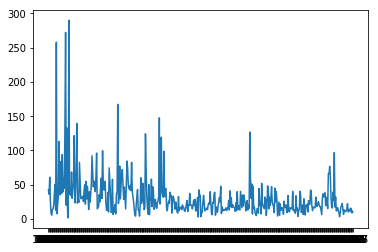

In [121]:
plt.plot(numbers['p-w-ratio'])

In [122]:
numbers['p-w-ratio'].mean()

31.02881954216701

In [126]:
numbers['p-w-ratio'].idxmax()

'301454'

In [131]:
numbers.loc['301454']

Motorcycles            1.000000
PassCars            1843.000000
Buses                  6.000000
SUTrucks               4.000000
CTrucks                3.000000
PickupsPanelVans     179.000000
passenger           2029.000000
work                   7.000000
p-w-ratio            289.857143
XCOORD               -77.379520
YCOORD                39.007690
Name: 301454, dtype: float64

In [134]:
numbers.loc[[numbers['p-w-ratio'].idxmax(), numbers['p-w-ratio'].idxmin()]].to_csv('test.csv', index=False)

In [130]:
numbers['XCOORD'] = geo_info.XCOORD
numbers['YCOORD'] = geo_info.YCOORD